# Fun Uses of Face Recognition

We'll have our program draw makeup on each of these people. How about we draw purple lipstick on each persons lips and maybe highlight their eyebrows. 

In [9]:
from PIL import Image, ImageDraw
import PIL
from pathlib import Path
import os
import face_recognition # access to the face detection model in DLIB

In [10]:
# Load the jpg file into a numpy array
image = face_recognition.load_image_file("Images/people.jpg")
image = face_recognition.load_image_file("Images/group.jpg")
image = face_recognition.load_image_file("Images/cropped.png")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image) # dictionary

'''
 Each entry will be a Python dictionary or hash table that 
 contains all the points that correspond to each major facial feature.
'''

# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image = Image.fromarray(image)

# Create a PIL drawing object to be able to draw lines later
d = ImageDraw.Draw(pil_image, 'RGBA')

'''
 This will give us access to drawing tools that we'll use to trace out the face landmarks on each 
 face. Notice that I also passed an RGBA as an option when creating the image draw object. 
 That tells PIL that we wanna treat our drawing as a four-channel image. We'll have the normal 
 three-channels for red, green and blue, but we'll also have an extra channel that controls image 
 transparency so it will let us draw on top of the image using semi-transparent colors which will 
 look a little nicer than using solid colors. 
'''

# Loop through each face in our image and give us all the face landmarks for that face
for face_landmarks in face_landmarks_list:
    # The face landmark detection model returns these features:
    #  - chin, left_eyebrow, right_eyebrow, nose_bridge, nose_tip, left_eye, right_eye, top_lip, bottom_lip

    # Draw a line over the eyebrows
    d.line(face_landmarks['left_eyebrow'], fill=(128, 0, 128, 100), width=3) # pass in the key name
    d.line(face_landmarks['right_eyebrow'], fill=(128, 0, 128, 100), width=3)

    # Draw over the lips
    d.polygon(face_landmarks['top_lip'], fill=(128, 0, 128, 100))
    d.polygon(face_landmarks['bottom_lip'], fill=(128, 0, 128, 100))

# Show the final image
pil_image.show()

------------------------------------

## Finding lookalikes with face recognition

In [11]:
# Load the image of the person we want to find similar people for
known_image = face_recognition.load_image_file("Images/cropped.png")

# Encode the known image
known_image_encoding = face_recognition.face_encodings(known_image)[0]

# Variables to keep track of the most similar face match we've found
best_face_distance = 1.0
best_face_image = None

# Loop over all the images we want to check for similar people
for image_path in Path("Images/people").glob("*.png"):
    # Load an image to check
    unknown_image = face_recognition.load_image_file(image_path)

    # Get the location of faces and face encodings for the current image
    face_encodings = face_recognition.face_encodings(unknown_image)

    # Get the face distance between the known person and all the faces in this image
    face_distance = face_recognition.face_distance(face_encodings, known_image_encoding)[0]
    
    '''
     The result of this function is a list. Each item in the list represents the distance 
     between our known image and one of the unknown images. The results are in the same order 
     as the "face_encodings" that we passed in. But since we know that each of our images in 
     the "people" folder only has one face, I'll just grab the first "face_distance" result 
     by passing in array index zero.
    '''

    # If this face is more similar to our known image than we've seen so far, save it
    if face_distance < best_face_distance:
        # Save the new best face distance
        best_face_distance = face_distance
        # Extract a copy of the actual face image itself so we can display it
        best_face_image = unknown_image

# Display the face image that we found to be the best match!
pil_image = Image.fromarray(best_face_image)
pil_image.show()


## Search This Image in another Folder

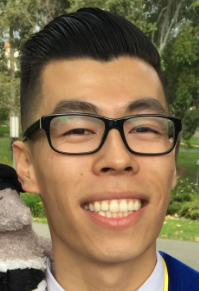

In [12]:
Image.open('Images/cropped.png')

## Result Found

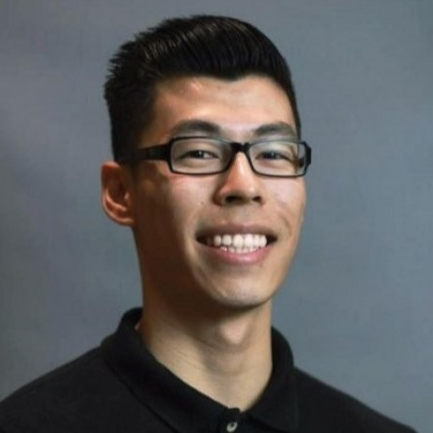

In [13]:
Image.open('Images/people/headshot2.png')